In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import sys
import casadi as ca
import os
import matplotlib.pyplot as plt
sys.path.insert(0, '../../src')

from pymoca.backends.xml import model, sim_scipy, analysis
from pymoca.backends.xml import parser as parse_xml
from pymoca.backends.xml.generator import generate as generate_xml
from pymoca.parser import parse as parse_mo

## Bouncing Ball 

This example:
1. Reads a ModelicaXML file
2. Parses it and creates an Casadi HybridDAE model.
3. Converts the HybridDAE model to a HybridODE model.
4. Simulates it using scipy.integration

In [2]:
m1_xml = os.path.join(
    '..', 'models', 'bouncing-ball.xml')
m1_ca = parse_xml.parse_file(m1_xml)
m1_ca


c       (  3):	[c_0, c_1, c_2]
dx      (  2):	[der(x), der(v)]
f_c     (  3):	@1=0, [(x<@1), (x<@1), ((fabs(v)<0.1)&&(x<@1))]
f_i     (  2):	@1=(c_1&&(!pre(c_1))), @2=(!(c_2&&(!pre(c_2)))), [x, ((@1?(-(@2?(v*c):0)):0)+((!@1)?(@2?v:0):0))]
f_m     (  1):	@1=(c_1&&(!pre(c_1))), ((@1?v:0)+((!@1)?y:0))
f_x     (  2):	[(der(x)-v), ((c_0?der(v):0)+((!c_0)?(der(v)+g):0))]
m       (  1):	y
p       (  2):	[g, c]
pre_c   (  3):	[pre(c_0), pre(c_1), pre(c_2)]
pre_m   (  0):	[]
t       (  1):	time
x       (  2):	[x, v]
y       (  0):	[]

In [3]:
m1_ode = m1_ca.to_ode()
m1_ode


c       (  3):	[c_0, c_1, c_2]
dx      (  2):	[der(x), der(v)]
f_c     (  3):	@1=0, [(x<@1), (x<@1), ((fabs(v)<0.1)&&(x<@1))]
f_i     (  2):	@1=(c_1&&(!pre(c_1))), @2=(!(c_2&&(!pre(c_2)))), [x, ((@1?(-(@2?(v*c):0)):0)+((!@1)?(@2?v:0):0))]
f_m     (  1):	@1=(c_1&&(!pre(c_1))), ((@1?v:0)+((!@1)?y:0))
f_x_rhs (  2):	@1=(!c_0), @2=1, [v, (-((@1?g:0)/((c_0?@2:0)+(@1?@2:0))))]
m       (  1):	y
p       (  2):	[g, c]
pre_c   (  3):	[pre(c_0), pre(c_1), pre(c_2)]
pre_m   (  0):	[]
t       (  1):	time
x       (  2):	[x, v]
y       (  0):	[]
y_rhs   (  0):	[]

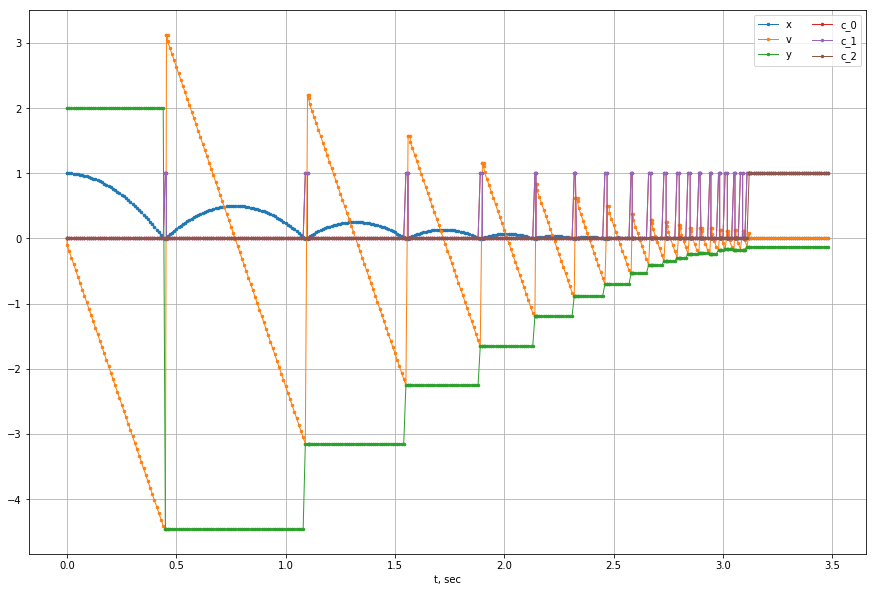

In [4]:
m1_ode.prop['x']['start'] = 1
data1 = sim_scipy.sim(m1_ode, {'dt': 0.01, 'tf': 3.5, 'integrator': 'dopri5'})
plt.figure(figsize=(15, 10))
analysis.plot(data1, marker='.', linewidth=1, markersize=5)

## Simple Circuit

This example:
1. Reads a Modelica file
2. Converts the Modelica file to ModelicaXML
3. Parses the ModelicaXML file and creates a Casadi HybridDAE model.
3. Converts the HybridDAE model to a HybridODE model.
4. Simulates it using scipy.integration

In [5]:
simple_circuit_file = os.path.join(
    '..', 'models', 'SimpleCircuit.mo')
m2_mo = parse_mo(open(simple_circuit_file, 'r').read())
m2_xml = generate_xml(m2_mo, 'SimpleCircuit')
m2_ca = parse_xml.parse(m2_xml)
m2_ca


c       (  0):	[]
dx      (  2):	[der(C.v), der(L.i)]
f_c     (  0):	[]
f_i     (  2):	[C.v, L.i]
f_m     (  0):	[]
f_x     ( 33):	[(R1.v-(R1.p.v-R1.n.v)), (-(R1.p.i+R1.n.i)), (R1.i-R1.p.i), (R1.v-(R1.i*R1.R)), (C.v-(C.p.v-C.n.v)), (-(C.p.i+C.n.i)), (C.i-C.p.i), (C.i-(C.C*der(C.v))), (R2.v-(R2.p.v-R2.n.v)), (-(R2.p.i+R2.n.i)), (R2.i-R2.p.i), (R2.v-(R2.i*R2.R)), (L.v-(L.p.v-L.n.v)), (-(L.p.i+L.n.i)), (L.i-L.p.i), (L.v-(L.L*der(L.i))), (AC.v-(AC.p.v-AC.n.v)), (-(AC.p.i+AC.n.i)), (AC.i-AC.p.i), (AC.v-(AC.VA*sin((((2*AC.PI)*AC.f)*time)))), G.p.v, (i-L.i), (AC.p.v-R1.p.v), (R1.n.v-C.p.v), (C.n.v-AC.n.v), (R1.p.v-R2.p.v), (R2.n.v-L.p.v), (L.n.v-C.n.v), (AC.n.v-G.p.v), (AC.p.i+(R1.p.i+R2.p.i)), (R1.n.i+C.p.i), (C.n.i+(AC.n.i+(L.n.i+G.p.i))), (R2.n.i+L.p.i)]
m       (  0):	[]
p       (  7):	[R1.R, C.C, R2.R, L.L, AC.VA, AC.f, AC.PI]
pre_c   (  0):	[]
pre_m   (  0):	[]
t       (  1):	time
x       (  2):	[C.v, L.i]
y       ( 31):	[i, R1.p.v, R1.p.i, R1.n.v, R1.n.i, R1.v, R1.i, C.p.v, C.p.i, C.n

In [6]:
m2_ode = m2_ca.to_ode()
m2_ode


c       (  0):	[]
dx      (  2):	[der(C.v), der(L.i)]
f_c     (  0):	[]
f_i     (  2):	[C.v, L.i]
f_m     (  0):	[]
f_x_rhs (  2):	[(C.i/C.C), (L.v/L.L)]
m       (  0):	[]
p       (  7):	[R1.R, C.C, R2.R, L.L, AC.VA, AC.f, AC.PI]
pre_c   (  0):	[]
pre_m   (  0):	[]
t       (  1):	time
x       (  2):	[C.v, L.i]
y       ( 31):	[i, R1.p.v, R1.p.i, R1.n.v, R1.n.i, R1.v, R1.i, C.p.v, C.p.i, C.n.v, C.n.i, C.i, R2.p.v, R2.p.i, R2.n.v, R2.n.i, R2.v, R2.i, L.p.v, L.p.i, L.n.v, L.n.i, L.v, AC.p.v, AC.p.i, AC.n.v, AC.n.i, AC.v, AC.i, G.p.v, G.p.i]
y_rhs   ( 31):	@1=(AC.VA*sin((((2*AC.PI)*AC.f)*time))), @2=(@1-C.v), @3=(@2/R1.R), @4=0, @5=(R2.R*L.i), @6=(@1-@5), @7=(@3+L.i), [L.i, @1, @3, C.v, (-@3), @2, @3, C.v, @3, @4, (-@3), @3, @1, L.i, @6, (-L.i), @5, L.i, @6, L.i, @4, (-L.i), @6, @1, (-@7), @4, @7, @1, (-@7), @4, @4]

In [7]:
m2_ode.prop.keys()

dict_keys(['i', 'R1.p.v', 'R1.p.i', 'R1.n.v', 'R1.n.i', 'R1.v', 'R1.i', 'R1.R', 'C.p.v', 'C.p.i', 'C.n.v', 'C.n.i', 'C.v', 'C.i', 'C.C', 'R2.p.v', 'R2.p.i', 'R2.n.v', 'R2.n.i', 'R2.v', 'R2.i', 'R2.R', 'L.p.v', 'L.p.i', 'L.n.v', 'L.n.i', 'L.v', 'L.i', 'L.L', 'AC.p.v', 'AC.p.i', 'AC.n.v', 'AC.n.i', 'AC.v', 'AC.i', 'AC.VA', 'AC.f', 'AC.PI', 'G.p.v', 'G.p.i'])

In [8]:
m2_ode.prop['AC.f']['value'] = 60
m2_ode.prop['AC.VA']['value'] = 110

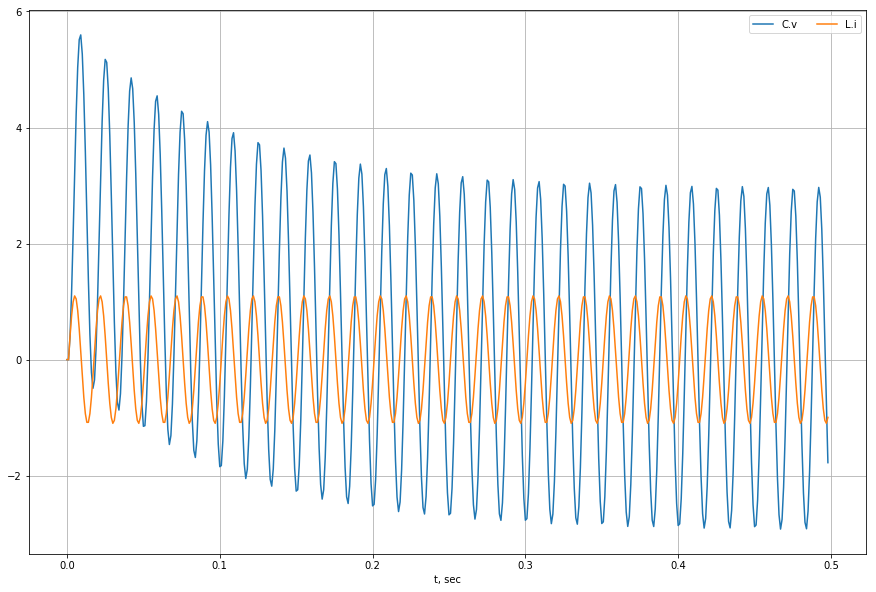

In [9]:
data2 = sim_scipy.sim(m2_ode, {'dt': 0.001, 'tf': 0.5, 'integrator': 'dopri5'})
plt.figure(figsize=(15, 10))
analysis.plot(data2, fields=['x'])

## Noise Simulation

This example demonstrates using the string based parser and also noise simulation.

In [61]:
model_txt = """
model Simple
    Real x(start=0);
    discrete Real y;
    discrete Real v;
    discrete Real time_last(start=0);
equation
    der(x) = v;
    when (abs(x) >= 2) then
        reinit(x, 0);
    end when;
    when (time - time_last > 0.1) then
        v = 1 + noise_gaussian(0, 0.1);
        y = x + noise_gaussian(0, 0.1);
        time_last = time;
    end when;
end Simple;
"""
m3_mo = parse_mo(model_txt)
m3_xml = generate_xml(m3_mo, 'Simple')
print(m3_xml)

<modelica xmlns:py="http://codespeak.net/lxml/objectify/pytype" xmlns:xsd="http://www.w3.org/2001/XMLSchema" xmlns:xsi="http://www.w3.org/2001/XMLSchema-instance" format="1.0">
  <declarations>
    <classDefinition name="Simple">
      <class kind="model">
        <component name="x">
          <builtin name="Real"/>
          <modifier/>
        </component>
        <component name="y" variability="discrete">
          <builtin name="Real"/>
          <modifier/>
        </component>
        <component name="v" variability="discrete">
          <builtin name="Real"/>
          <modifier/>
        </component>
        <component name="time_last" variability="discrete">
          <builtin name="Real"/>
          <modifier/>
        </component>
        <equation>
          <equal>
            <operator name="der">
              <local name="x"/>
            </operator>
            <local name="v"/>
          </equal>
          <when>
            <cond>
              <apply builtin="&gt;

In [62]:
m3_ca = parse_xml.parse(m3_xml)
m3_ca


c       (  2):	[c_0, c_1]
dx      (  1):	der(x)
f_c     (  2):	[(2<=fabs(x)), (0.1<(time-time_last))]
f_i     (  1):	((!(c_0&&(!pre(c_0))))?x:0)
f_m     (  3):	@1=(c_1&&(!pre(c_1))), @2=0.1, @3=(c_1&&(!pre(c_1))), @4=(c_1&&(!pre(c_1))), [((@1?(x+(@2*ng_1)):0)+((!@1)?y:0)), ((@3?(1+(@2*ng_0)):0)+((!@3)?v:0)), ((@4?time:0)+((!@4)?time_last:0))]
f_x     (  1):	(der(x)-v)
m       (  3):	[y, v, time_last]
ng      (  2):	[ng_0, ng_1]
p       (  0):	[]
pre_c   (  2):	[pre(c_0), pre(c_1)]
pre_m   (  0):	[]
t       (  1):	time
x       (  1):	x
y       (  0):	[]

In [63]:
m3_ode = m3_ca.to_ode()
m3_ode


c       (  2):	[c_0, c_1]
dx      (  1):	der(x)
f_c     (  2):	[(2<=fabs(x)), (0.1<(time-time_last))]
f_i     (  1):	((!(c_0&&(!pre(c_0))))?x:0)
f_m     (  3):	@1=(c_1&&(!pre(c_1))), @2=0.1, @3=(c_1&&(!pre(c_1))), @4=(c_1&&(!pre(c_1))), [((@1?(x+(@2*ng_1)):0)+((!@1)?y:0)), ((@3?(1+(@2*ng_0)):0)+((!@3)?v:0)), ((@4?time:0)+((!@4)?time_last:0))]
f_x_rhs (  1):	v
m       (  3):	[y, v, time_last]
ng      (  2):	[ng_0, ng_1]
p       (  0):	[]
pre_c   (  2):	[pre(c_0), pre(c_1)]
pre_m   (  0):	[]
t       (  1):	time
x       (  1):	x
y       (  0):	[]
y_rhs   (  0):	[]

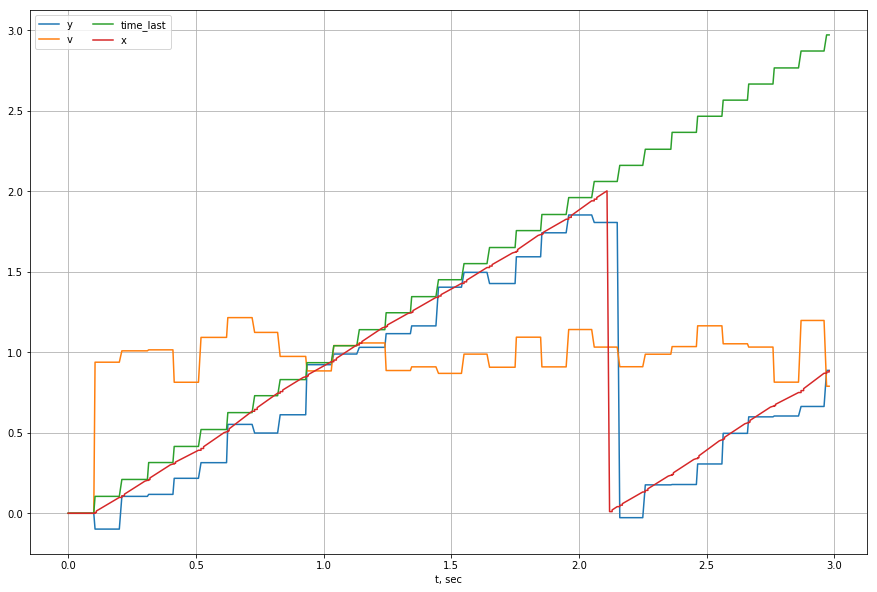

In [64]:
m3_ode.prop['x']['start'] = 0
data = sim_scipy.sim(m3_ode, {'dt': 0.01, 'tf': 3})
plt.figure(figsize=(15, 10))
analysis.plot(data, fields=['m', 'x', 'y'])